In [12]:
import os
os.getcwd()

'/Users/ovishake'

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
train = pd.read_csv("./titanic/train.csv")
test = pd.read_csv("./titanic/test.csv")

In [14]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [17]:
train.set_index("PassengerId", inplace=True)
test.set_index("PassengerId", inplace=True)
y_train = train["Survived"]
train.drop(labels="Survived", axis=1, inplace=True)
#after dropping the prediction Survived the data set has same architecture/shape
print(train.shape)
print(test.shape)

(891, 10)
(418, 10)


In [25]:
columns_to_drop = ["Name", "Age", "SibSp", "Ticket", "Cabin", "Parch", "Embarked"]
train_test.drop(labels=columns_to_drop, axis=1, inplace=True)
train_test =  train.append(test)
train_test_dummies = pd.get_dummies(train_test, columns=["Sex"])
print(train_test.shape)
print(train_test_dummies.shape)
# replace nulls with 0.0
train_test_dummies.fillna(value=0.0, inplace=True)

(1309, 10)
(1309, 11)


In [26]:
train_test_dummies.head()

,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male
PassengerId,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,S,0,1
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,1,0
3,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,S,1,0
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,1,0
5,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,S,0,1


In [29]:
columns_to_drop = ["Name", "Age", "SibSp", "Ticket", "Cabin", "Parch", "Embarked"]
train_test_dummies.drop(labels=columns_to_drop, axis=1, inplace=True)

In [30]:
train_test_dummies.head()

,Pclass,Fare,Sex_female,Sex_male
PassengerId,,,,
1,3,7.2500,0,1
2,1,71.2833,1,0
3,3,7.9250,1,0
4,1,53.1000,1,0
5,3,8.0500,0,1


In [31]:
#features of the data
X_train = train_test_dummies.values[0:891]
X_test = train_test_dummies.values[891:]

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [33]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

In [34]:
train_test_dummies.shape

(1309, 4)

In [35]:
X_train.shape

(891, 4)

In [36]:
X_test.shape

(418, 4)

In [44]:
from sklearn.model_selection import train_test_split
X_train_sub, X_validation_sub, y_train_sub, y_validation_sub = train_test_split(X_train_scale, y_train, random_state=0)
print(X_train_sub.shape)
print(y_train_sub.shape)
print(y_validation_sub)

(668, 4)
(668,)
PassengerId
496    0
649    0
279    0
32     1
256    1
299    1
610    1
319    1
485    1
368    1
705    0
347    1
197    0
536    1
311    1
15     0
351    0
146    0
615    0
804    1
145    0
709    1
779    0
271    0
475    0
320    1
520    0
142    1
881    1
643    0
      ..
728    1
429    0
55     0
46     0
173    1
448    1
598    0
205    1
241    0
673    0
40     1
284    1
309    0
19     0
770    0
157    1
483    0
211    0
648    1
51     0
853    0
240    0
647    0
123    0
789    1
168    0
307    1
380    0
743    1
11     1
Name: Survived, Length: 223, dtype: int64


In [46]:
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=20, learning_rate = learning_rate, max_features=4, max_depth = 2, random_state = 0)
    gb.fit(X_train_sub, y_train_sub)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train_sub, y_train_sub)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(X_validation_sub, y_validation_sub)))
    print()

('Learning rate: ', 0.05)
Accuracy score (training): 0.783
Accuracy score (validation): 0.798
()
('Learning rate: ', 0.1)
Accuracy score (training): 0.816
Accuracy score (validation): 0.803
()
('Learning rate: ', 0.25)
Accuracy score (training): 0.820
Accuracy score (validation): 0.803
()
('Learning rate: ', 0.5)
Accuracy score (training): 0.843
Accuracy score (validation): 0.812
()
('Learning rate: ', 0.75)
Accuracy score (training): 0.844
Accuracy score (validation): 0.807
()
('Learning rate: ', 1)
Accuracy score (training): 0.861
Accuracy score (validation): 0.825
()


In [47]:
gb = GradientBoostingClassifier(n_estimators=20, learning_rate = 1, max_features=4, max_depth = 2, random_state = 0)
gb.fit(X_train_sub, y_train_sub)
predictions = gb.predict(X_validation_sub)

In [48]:
print("Confusion Matrix:")
print(confusion_matrix(y_validation_sub, predictions))
print("Classification Report")
print(classification_report(y_validation_sub, predictions))

Confusion Matrix:
[[119  20]
 [ 19  65]]
Classification Report
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       139
           1       0.76      0.77      0.77        84

   micro avg       0.83      0.83      0.83       223
   macro avg       0.81      0.81      0.81       223
weighted avg       0.83      0.83      0.83       223



In [49]:
y_scores_gb = gb.decision_function(X_validation_sub)
fpr_gb, tpr_gb, _ = roc_curve(y_validation_sub, y_scores_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)

In [50]:
print("Area under ROC curve = {:0.4f}".format(roc_auc_gb))

Area under ROC curve = 0.8926


In [51]:
print("The AUC ROC is", roc_auc_gb)

('The AUC ROC is', 0.8925573826652964)


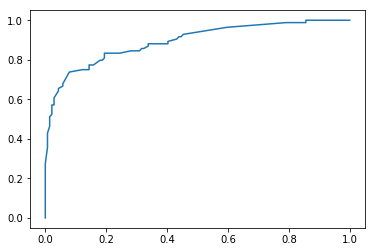

In [52]:
plt.plot(fpr_gb, tpr_gb)